### 1. Basic Pandas concepts

In [1]:
import pandas as pd

#### 1.1 Reading data

In [3]:
campaign = pd.read_csv("campaign.csv")

#### 1.2 Examine the data

In [4]:
campaign.shape

(10022, 10)

In [5]:
campaign.columns

Index(['user_id', 'date_served', 'marketing_channel', 'test_control',
       'converted', 'language_preferred', 'age_group', 'date_subscribed',
       'date_canceled', 'is_retained'],
      dtype='object')

In [7]:
campaign.head()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,1/1/2018,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,1/1/2018,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,1/1/2018,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,1/1/2018,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,1/1/2018,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True


In [9]:
campaign.describe()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
count,10022,10021,10022,10022,10022,10022,10022,1856,577,1856
unique,7294,31,5,2,2,4,7,31,115,2
top,a100000882,1/15/2018,House Ads,control,False,English,19-24 years,1/16/2018,4/2/2018,True
freq,12,789,4733,5076,8946,9260,1679,163,15,1279


In [10]:
campaign["marketing_channel"]

0        House Ads
1        House Ads
2        House Ads
3        House Ads
4        House Ads
           ...    
10017        Email
10018        Email
10019    Instagram
10020        Email
10021     Facebook
Name: marketing_channel, Length: 10022, dtype: object

In [11]:
campaign[["marketing_channel"]]

,marketing_channel
0,House Ads
1,House Ads
2,House Ads
3,House Ads
4,House Ads
...,...
10017,Email
10018,Email
10019,Instagram
10020,Email


In [12]:
len(campaign["user_id"])

10022

In [13]:
len(campaign["user_id"].unique())

7294

In [14]:
campaign["user_id"].nunique()

7294

In [15]:
campaign["user_id"].unique()

array(['a100000029', 'a100000030', 'a100000031', ..., 'a100007292',
       'a100007293', 'a100007294'], dtype=object)

In [16]:
campaign["marketing_channel"].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [17]:
campaign["marketing_channel"].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email'],
      dtype=object)

In [18]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10022 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   test_control        10022 non-null  object
 4   converted           10022 non-null  bool  
 5   language_preferred  10022 non-null  object
 6   age_group           10022 non-null  object
 7   date_subscribed     1856 non-null   object
 8   date_canceled       577 non-null    object
 9   is_retained         1856 non-null   object
dtypes: bool(1), object(9)
memory usage: 714.6+ KB


In [19]:
campaign.isnull()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
10017,False,False,False,False,False,False,False,False,False,False
10018,False,False,False,False,False,False,False,False,True,False
10019,False,False,False,False,False,False,False,False,True,False
10020,False,False,False,False,False,False,False,False,True,False


#### 1.3 Get the number of missing records in each column:

In [20]:
campaign.isnull().sum()

user_id                  0
date_served              1
marketing_channel        0
test_control             0
converted                0
language_preferred       0
age_group                0
date_subscribed       8166
date_canceled         9445
is_retained           8166
dtype: int64

#### 1.4 Get the number of users in different marketing channels:

In [21]:
campaign_new = pd.read_csv("campaign.csv")
campaign_new['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

### 2. Campaign result overview

#### 2.1 How many users receive marketing offers by day?

In [23]:
#Group by date_served
daily_users = campaign.groupby(['date_served'])['user_id'].nunique()
print(daily_users)

date_served
1/1/2018     362
1/10/2018    337
1/11/2018    310
1/12/2018    301
1/13/2018    306
1/14/2018    305
1/15/2018    767
1/16/2018    388
1/17/2018    369
1/18/2018    318
1/19/2018    305
1/2/2018     374
1/20/2018    311
1/21/2018    229
1/22/2018    178
1/23/2018    172
1/24/2018    190
1/25/2018    184
1/26/2018    222
1/27/2018    320
1/28/2018    320
1/29/2018    319
1/3/2018     348
1/30/2018    317
1/31/2018    340
1/4/2018     323
1/5/2018     319
1/6/2018     308
1/7/2018     275
1/8/2018     312
1/9/2018     312
Name: user_id, dtype: int64


#### 2.2 Visualization in Python

In [24]:
campaign['date_served']=pd.to_datetime(campaign['date_served']) 

In [25]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10022 non-null  object        
 1   date_served         10021 non-null  datetime64[ns]
 2   marketing_channel   10022 non-null  object        
 3   test_control        10022 non-null  object        
 4   converted           10022 non-null  bool          
 5   language_preferred  10022 non-null  object        
 6   age_group           10022 non-null  object        
 7   date_subscribed     1856 non-null   object        
 8   date_canceled       577 non-null    object        
 9   is_retained         1856 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(8)
memory usage: 714.6+ KB


In [26]:
daily_users = campaign.groupby(['date_served'])['user_id'].nunique()

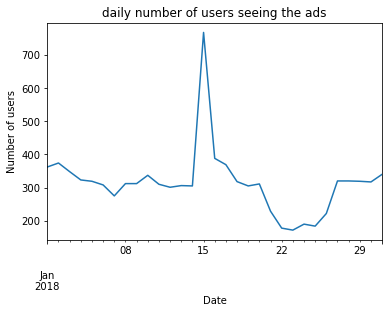

In [27]:
import matplotlib.pyplot as plt

# plot
daily_users.plot()

# annotate
plt.title('daily number of users seeing the ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.show()

In [51]:
# using Plotly
import plotly.graph_objects as go
line = go.Scatter(x=daily_users.index, y=daily_users.values)
fig = go.Figure(line)
fig.update_layout(title='Numbers of users Seeing the Ads per Day',
                 xaxis_title = 'Date',
                 yaxis_title = 'Number of users' 
                 )
fig.show()

#### 2.3 Common marketing metrics to evaluate campaign performance


**Conversion rate** = Number of people who converted / Total number of people who received offers

In [28]:
campaign.groupby(['converted'])['user_id'].nunique()

converted
False    6854
True     1015
Name: user_id, dtype: int64

In [29]:
campaign['user_id'].nunique()

7294

In [30]:
campaign.groupby(['converted'])['user_id'].nunique()/campaign['user_id'].nunique()

converted
False    0.939676
True     0.139155
Name: user_id, dtype: float64

In [31]:
conversation_rate = 1015 / 7294
conversation_rate

0.13915547024952016

**Retention rate** = Number of people who remained / Total number of people who converted

In [32]:
# Step one: create a boolean mask
campaign['is_retained']==True

0         True
1         True
2         True
3         True
4         True
         ...  
10017    False
10018     True
10019     True
10020     True
10021     True
Name: is_retained, Length: 10022, dtype: bool

In [33]:
# Step two: put the boolean mask into the dataframe
campaign.loc[campaign['is_retained']==True]

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
10008,a100007281,2018-01-17,Email,control,True,German,30-36 years,1/17/2018,NaN,True
10018,a100007291,2018-01-17,Email,control,True,German,55+ years,1/17/2018,NaN,True
10019,a100007292,2018-01-05,Instagram,control,False,German,55+ years,1/17/2018,NaN,True
10020,a100007293,2018-01-17,Email,control,True,German,0-18 years,1/17/2018,NaN,True


In [34]:
retained = campaign.loc[campaign['is_retained']==True]['user_id'].nunique()

In [35]:
print(retained)

678


In [36]:
converted = campaign.loc[campaign['converted']==True]['user_id'].nunique()

In [37]:
print(converted)

1015


In [38]:
retention_rate = retained / converted

In [39]:
print(round(retention_rate,2))

0.67


#### 2.4 Plot accumulative response rate by day:

In [40]:
daily_responder=campaign.loc[campaign['converted']==True].groupby(['date_served'])['user_id'].nunique()

In [41]:
daily_responder

date_served
2018-01-01    36
2018-01-02    37
2018-01-03    36
2018-01-04    35
2018-01-05    40
2018-01-06    35
2018-01-07    39
2018-01-08    36
2018-01-09    39
2018-01-10    40
2018-01-11    25
2018-01-12    23
2018-01-13    26
2018-01-14    26
2018-01-15    87
2018-01-16    99
2018-01-17    81
2018-01-18    29
2018-01-19    18
2018-01-20    21
2018-01-21    20
2018-01-22    22
2018-01-23    21
2018-01-24    22
2018-01-25    23
2018-01-26    20
2018-01-27    21
2018-01-28    20
2018-01-29    19
2018-01-30    21
2018-01-31    18
Name: user_id, dtype: int64

In [42]:
daily_responder.cumsum()

date_served
2018-01-01      36
2018-01-02      73
2018-01-03     109
2018-01-04     144
2018-01-05     184
2018-01-06     219
2018-01-07     258
2018-01-08     294
2018-01-09     333
2018-01-10     373
2018-01-11     398
2018-01-12     421
2018-01-13     447
2018-01-14     473
2018-01-15     560
2018-01-16     659
2018-01-17     740
2018-01-18     769
2018-01-19     787
2018-01-20     808
2018-01-21     828
2018-01-22     850
2018-01-23     871
2018-01-24     893
2018-01-25     916
2018-01-26     936
2018-01-27     957
2018-01-28     977
2018-01-29     996
2018-01-30    1017
2018-01-31    1035
Name: user_id, dtype: int64

In [43]:
accu_response_by_day = daily_responder.cumsum() / campaign['user_id'].nunique()

<AxesSubplot:xlabel='date_served'>

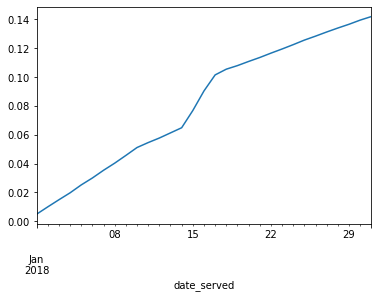

In [44]:
accu_response_by_day.plot()

#### 3. Customer Segmentation analysis
 - Use segemetnation analysis to 
    - Analyze campaign performance by each segments
    - Target profitable segments for next campaign

In [45]:
# Calculate how many unsers per marketing channel
campaign.groupby(['marketing_channel'])['user_id'].nunique()

marketing_channel
Email         553
Facebook     1758
House Ads    3968
Instagram    1740
Push          972
Name: user_id, dtype: int64

In [46]:
# How many customers are converted in each marketing channel
campaign.loc[campaign['converted']==True].groupby(['marketing_channel'])['user_id'].nunique()

marketing_channel
Email        187
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

**3.1 What is Conversion rate by channel**

In [47]:
# Conversion rate by channel
conversion_by_channel = campaign.loc[campaign['converted']==True].groupby(['marketing_channel'])['user_id'].nunique() / \
                        campaign.groupby(['marketing_channel'])['user_id'].nunique()


In [48]:
print(conversion_by_channel)

marketing_channel
Email        0.338156
Facebook     0.125711
House Ads    0.075101
Instagram    0.133333
Push         0.079218
Name: user_id, dtype: float64


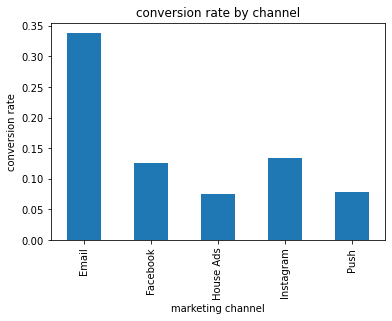

In [49]:
# plot conversion rate by channel:

import matplotlib.pyplot as plt

# plot
conversion_by_channel.plot(kind='bar')

# annotate
plt.title('conversion rate by channel')
plt.xlabel('marketing channel')
plt.ylabel('conversion rate')
plt.show()

**3.2 What is the Retention rate by each marketing channel?**

In [52]:
retention_by_channel = campaign.loc[campaign['is_retained']==True].groupby(['marketing_channel'])['user_id'].nunique() / \
                        campaign.loc[campaign['converted']==True].groupby(['marketing_channel'])['user_id'].nunique() 
                        
retention_by_channel

marketing_channel
Email        0.743316
Facebook     0.954751
House Ads    1.268456
Instagram    0.853448
Push         1.233766
Name: user_id, dtype: float64

In [53]:
print(retention_by_channel)

marketing_channel
Email        0.743316
Facebook     0.954751
House Ads    1.268456
Instagram    0.853448
Push         1.233766
Name: user_id, dtype: float64


#### 3.3 Why retention rate by channel can be larger than 1 when using Method One?

In [54]:
campaign.loc[(campaign['converted']==False) & (campaign['is_retained']==True)]

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
22,a100000050,2018-01-01,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True
24,a100000051,2018-01-01,Push,personalization,False,English,30-36 years,1/2/2018,NaN,True
26,a100000052,2018-01-01,House Ads,personalization,False,English,36-45 years,1/2/2018,NaN,True
28,a100000053,2018-01-01,House Ads,personalization,False,English,45-55 years,1/2/2018,NaN,True
30,a100000054,2018-01-01,House Ads,personalization,False,English,55+ years,1/2/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
9985,a100007258,2018-01-15,Email,personalization,False,German,24-30 years,1/15/2018,NaN,True
9993,a100007266,2018-01-16,Email,personalization,False,German,24-30 years,1/16/2018,NaN,True
10005,a100007278,2018-01-16,Email,control,False,German,0-18 years,1/16/2018,NaN,True
10019,a100007292,2018-01-05,Instagram,control,False,German,55+ years,1/17/2018,NaN,True


In [55]:
campaign.loc[campaign['user_id']=='a100000050']  # this cann't explain why the number of retained user can be larger than converted

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
21,a100000050,2018-01-02,House Ads,personalization,True,English,24-30 years,1/2/2018,NaN,True
22,a100000050,2018-01-01,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True


In [56]:
inv_id=campaign.loc[(campaign['converted']==False) & (campaign['is_retained']==True)]['user_id']

In [57]:
campaign.loc[campaign['user_id'].isin(inv_id)]

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
21,a100000050,2018-01-02,House Ads,personalization,True,English,24-30 years,1/2/2018,NaN,True
22,a100000050,2018-01-01,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True
23,a100000051,2018-01-02,House Ads,personalization,True,English,30-36 years,1/2/2018,NaN,True
24,a100000051,2018-01-01,Push,personalization,False,English,30-36 years,1/2/2018,NaN,True
25,a100000052,2018-01-02,House Ads,personalization,True,English,36-45 years,1/2/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
9985,a100007258,2018-01-15,Email,personalization,False,German,24-30 years,1/15/2018,NaN,True
9993,a100007266,2018-01-16,Email,personalization,False,German,24-30 years,1/16/2018,NaN,True
10005,a100007278,2018-01-16,Email,control,False,German,0-18 years,1/16/2018,NaN,True
10019,a100007292,2018-01-05,Instagram,control,False,German,55+ years,1/17/2018,NaN,True


##### 4. Customer Segmentation analysis by more than one segments

In [58]:
language_age_convert=campaign.loc[campaign['converted']==True].groupby(['language_preferred', 'age_group'])['user_id'].nunique()

In [59]:
print(language_age_convert)

language_preferred  age_group  
Arabic              0-18 years       4
                    19-24 years      2
                    24-30 years      8
                    36-45 years      1
                    45-55 years      3
                    55+ years        1
English             0-18 years     168
                    19-24 years    281
                    24-30 years    201
                    30-36 years     69
                    36-45 years     65
                    45-55 years     61
                    55+ years       66
German              0-18 years      13
                    19-24 years     14
                    24-30 years     17
                    30-36 years      3
                    36-45 years      4
                    45-55 years      6
                    55+ years        2
Spanish             0-18 years       7
                    19-24 years      6
                    24-30 years      2
                    30-36 years      5
                    36-45 years 

In [60]:
language_age_convert.unstack(level=1)

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,4.0,2.0,8.0,NaN,1.0,3.0,1.0
English,168.0,281.0,201.0,69.0,65.0,61.0,66.0
German,13.0,14.0,17.0,3.0,4.0,6.0,2.0
Spanish,7.0,6.0,2.0,5.0,4.0,5.0,7.0


In [61]:
df_language_age_convert=pd.DataFrame(language_age_convert.unstack(level=1))

In [62]:
print(df_language_age_convert)

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                     4.0          2.0          8.0          NaN   
English                  168.0        281.0        201.0         69.0   
German                    13.0         14.0         17.0          3.0   
Spanish                    7.0          6.0          2.0          5.0   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                      1.0          3.0        1.0  
English                    65.0         61.0       66.0  
German                      4.0          6.0        2.0  
Spanish                     4.0          5.0        7.0  


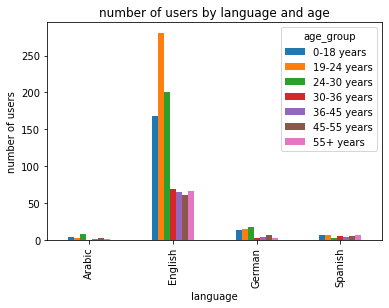

In [63]:
# plot
df_language_age_convert.plot(kind='bar')

# annotate
plt.title('number of users by language and age')
plt.xlabel('language')
plt.ylabel('number of users')
plt.show()

In [64]:
# using plotly
bar1 = go.Bar(x=df_language_age_convert.index, y=df_language_age_convert['0-18 years'], name='0-18 years')
bar2 = go.Bar(x=df_language_age_convert.index, y=df_language_age_convert['19-24 years'], name='19-24 years')
bar3 = go.Bar(x=df_language_age_convert.index, y=df_language_age_convert['24-30 years'], name='24-30 years')
bar4 = go.Bar(x=df_language_age_convert.index, y=df_language_age_convert['30-36 years'], name='30-36 years')
bar5 = go.Bar(x=df_language_age_convert.index, y=df_language_age_convert['36-45 years'], name='36-45 years')
bar6 = go.Bar(x=df_language_age_convert.index, y=df_language_age_convert['45-55 years'], name='45-55 years')
bar7 = go.Bar(x=df_language_age_convert.index, y=df_language_age_convert['55+ years'], name='55+ years')
fig = go.Figure([bar1, bar2, bar3, bar4, bar5, bar6, bar7])
fig.update_layout(barmode='group')
fig.show()

**Looking at the number of converted users by these 2 segments are not very informative.
Should we look at conversion rate by language and age?**

In [68]:
language_age_converted=campaign.loc[campaign['converted']==True].groupby(['language_preferred', 'age_group'])['user_id'].nunique()
language_age_converted

language_preferred  age_group  
Arabic              0-18 years       4
                    19-24 years      2
                    24-30 years      8
                    36-45 years      1
                    45-55 years      3
                    55+ years        1
English             0-18 years     168
                    19-24 years    281
                    24-30 years    201
                    30-36 years     69
                    36-45 years     65
                    45-55 years     61
                    55+ years       66
German              0-18 years      13
                    19-24 years     14
                    24-30 years     17
                    30-36 years      3
                    36-45 years      4
                    45-55 years      6
                    55+ years        2
Spanish             0-18 years       7
                    19-24 years      6
                    24-30 years      2
                    30-36 years      5
                    36-45 years 

In [65]:
language_age=campaign.groupby(['language_preferred', 'age_group'])['user_id'].nunique()
language_age

language_preferred  age_group  
Arabic              0-18 years       16
                    19-24 years      18
                    24-30 years      16
                    30-36 years      12
                    36-45 years      13
                    45-55 years      14
                    55+ years        17
English             0-18 years     1124
                    19-24 years    1215
                    24-30 years    1119
                    30-36 years     976
                    36-45 years     991
                    45-55 years     976
                    55+ years       920
German              0-18 years       24
                    19-24 years      23
                    24-30 years      29
                    30-36 years      12
                    36-45 years      14
                    45-55 years      20
                    55+ years         9
Spanish             0-18 years       43
                    19-24 years      51
                    24-30 years      54
        

In [67]:
df_language_age_convt_rate=language_age_converted/language_age
df_language_age_convt_rate

language_preferred  age_group  
Arabic              0-18 years     0.250000
                    19-24 years    0.111111
                    24-30 years    0.500000
                    30-36 years         NaN
                    36-45 years    0.076923
                    45-55 years    0.214286
                    55+ years      0.058824
English             0-18 years     0.149466
                    19-24 years    0.231276
                    24-30 years    0.179625
                    30-36 years    0.070697
                    36-45 years    0.065590
                    45-55 years    0.062500
                    55+ years      0.071739
German              0-18 years     0.541667
                    19-24 years    0.608696
                    24-30 years    0.586207
                    30-36 years    0.250000
                    36-45 years    0.285714
                    45-55 years    0.300000
                    55+ years      0.222222
Spanish             0-18 years     0.162791


In [69]:
df_language_age_convt_rate=pd.DataFrame(df_language_age_convt_rate.unstack())
df_language_age_convt_rate

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,0.250000,0.111111,0.500000,NaN,0.076923,0.214286,0.058824
English,0.149466,0.231276,0.179625,0.070697,0.065590,0.062500,0.071739
German,0.541667,0.608696,0.586207,0.250000,0.285714,0.300000,0.222222
Spanish,0.162791,0.117647,0.037037,0.087719,0.102564,0.106383,0.205882


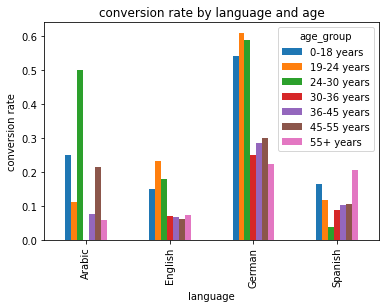

In [70]:
# plot
df_language_age_convt_rate.plot(kind='bar')

# annotate
plt.title('conversion rate by language and age')
plt.xlabel('language')
plt.ylabel('conversion rate')
plt.show()

In [72]:
# using plotly
bar8 = go.Bar(x=df_language_age_convt_rate.index, y=df_language_age_convt_rate['0-18 years'], name='0-18 years')
bar9 = go.Bar(x=df_language_age_convt_rate.index, y=df_language_age_convt_rate['19-24 years'], name='19-24 years')
bar10 = go.Bar(x=df_language_age_convt_rate.index, y=df_language_age_convt_rate['24-30 years'], name='24-30 years')
bar11 = go.Bar(x=df_language_age_convt_rate.index, y=df_language_age_convt_rate['30-36 years'], name='30-36 years')
bar12 = go.Bar(x=df_language_age_convt_rate.index, y=df_language_age_convt_rate['36-45 years'], name='36-45 years')
bar13 = go.Bar(x=df_language_age_convt_rate.index, y=df_language_age_convt_rate['45-55 years'], name='45-55 years')
bar14 = go.Bar(x=df_language_age_convt_rate.index, y=df_language_age_convt_rate['55+ years'], name='55+ years')
fig = go.Figure([bar8, bar9, bar10, bar11, bar12, bar13, bar14])
fig.update_layout(barmode='group')
fig.show()

In [73]:
# The barmode property determines how bars at the same location coordinate are displayed on the graph. 
# Defined values are "stack" (bars stacked on top of one another), "relative", 
# (bars are stacked on top of one another, with negative values below the axis, positive values above),
# "group" (bars plotted next to one another).
fig.update_layout(barmode='stack')
fig.show()

### 3. A/B Testing

In a typical A/B testing setting, you would create and test two or more versions of marketing strategies for their effectiveness in achieving your marketing goal. Consider a case where your goal is to improve marketing email open rates.

If your hypothesis is that email subject line B will result in higher open rates than email subject line A, then you would run an A/B test with these two subject lines. You will randomly select half of the users and send out marketing emails with subject line A. The other half of randomly selected users will receive emails with subject line B. You will run this test for a predetermined period of time (which could be one week, two weeks, or one month, for instance) or until a predetermined number of users receive the two versions of emails (which is a minimum of 1,000 users to receive each version of the subject line). Once your tests are complete, then you analyze and evaluate the experiment results. When analyzing the results, you will need to check whether there is a statistically significant difference between the results of the two versions.

In [74]:
from scipy import stats
import numpy as np

In [75]:
campaign['test_control'].value_counts()

control            5076
personalization    4946
Name: test_control, dtype: int64

In [76]:
# Let's only look at Email marketing channel
email = campaign.loc[campaign['marketing_channel'] == 'Email']

In [77]:
print(email)

          user_id date_served marketing_channel     test_control  converted  \
354    a100000526  2018-01-01             Email  personalization       True   
358    a100000530  2018-01-05             Email  personalization       True   
362    a100000534  2018-01-09             Email  personalization      False   
366    a100000538  2018-01-13             Email  personalization       True   
370    a100000542  2018-01-17             Email  personalization       True   
...           ...         ...               ...              ...        ...   
10015  a100007288  2018-01-17             Email          control       True   
10016  a100007289  2018-01-17             Email          control       True   
10017  a100007290  2018-01-17             Email          control       True   
10018  a100007291  2018-01-17             Email          control       True   
10020  a100007293  2018-01-17             Email          control       True   

      language_preferred    age_group date_subscrib

In [78]:
email.groupby(['test_control'])['user_id'].nunique()

test_control
control            270
personalization    284
Name: user_id, dtype: int64

In [79]:
# Let's compare the conversion rate between test and control group
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()

test_control
control             76
personalization    111
Name: user_id, dtype: int64

In [80]:
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()\
/email.groupby(['test_control'])['user_id'].nunique()

test_control
control            0.281481
personalization    0.390845
Name: user_id, dtype: float64

#### Calculate the **lift**:

**lift** = (Test conversion rate - Control conversion rate) / Control converstion rate

In [81]:
lift = (0.390845 - 0.281481)/ 0.281481

In [83]:
print(lift)

0.38853066459192637


#### 3.2 Create a dataframe only including control group and conversion information


In [85]:
control = email.loc[email['test_control']=='control']['converted']
control

532      False
533       True
534       True
535       True
536       True
         ...  
10015     True
10016     True
10017     True
10018     True
10020     True
Name: converted, Length: 274, dtype: bool

#### 3.3 Calculate the average conversion rate for control group:


In [86]:
control_mean=np.mean(control)
control_mean

0.291970802919708

#### 3.4 Why the number doesn't match the previous result?

In [87]:
email.loc[email['test_control']=='control']

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
532,a100000687,2018-01-16,Email,control,False,English,0-18 years,1/16/2018,NaN,True
533,a100000688,2018-01-16,Email,control,True,English,19-24 years,1/16/2018,NaN,True
534,a100000689,2018-01-17,Email,control,True,English,24-30 years,1/17/2018,NaN,True
535,a100000690,2018-01-17,Email,control,True,English,30-36 years,1/17/2018,NaN,True
536,a100000691,2018-01-17,Email,control,True,English,36-45 years,1/17/2018,2/25/2018,False
...,...,...,...,...,...,...,...,...,...,...
10015,a100007288,2018-01-17,Email,control,True,German,30-36 years,1/17/2018,4/26/2018,False
10016,a100007289,2018-01-17,Email,control,True,German,36-45 years,1/17/2018,1/27/2018,False
10017,a100007290,2018-01-17,Email,control,True,German,45-55 years,1/17/2018,1/24/2018,False
10018,a100007291,2018-01-17,Email,control,True,German,55+ years,1/17/2018,NaN,True


In [88]:
email.loc[email['test_control']=='control'].groupby(['user_id'])['converted'].max()

user_id
a100000687    False
a100000688     True
a100000689     True
a100000690     True
a100000691     True
              ...  
a100007288     True
a100007289     True
a100007290     True
a100007291     True
a100007293     True
Name: converted, Length: 270, dtype: bool

In [89]:
# use groupby to dedup(remove duplicates)
control=email.loc[email['test_control']=='control'].groupby(['user_id'])['converted'].max()
control

user_id
a100000687    False
a100000688     True
a100000689     True
a100000690     True
a100000691     True
              ...  
a100007288     True
a100007289     True
a100007290     True
a100007291     True
a100007293     True
Name: converted, Length: 270, dtype: bool

In [90]:
email.loc[(email['test_control']=='control') & (email['converted']==True)]['user_id'].nunique()

76

In [91]:
email.loc[(email['test_control']=='control') & (email['converted']==False)]['user_id'].nunique()

194

In [92]:
# Convert groupby result to a dataframe
control=pd.DataFrame(control)
control.head()

,converted
user_id,
a100000687,False
a100000688,True
a100000689,True
a100000690,True
a100000691,True


In [93]:
control_mean=np.mean(control['converted'])
control_mean

0.2814814814814815

In [94]:
# Do the same steps for Test group and calcualate the lift

# Use groupby to dedup(remove duplicates)
test=email.loc[email['test_control']=='personalization'].groupby(['user_id'])['converted'].max()

# Convert groupby result to a dataframe
test=pd.DataFrame(test)

test_mean=np.mean(test['converted'])
test_mean

0.3908450704225352

### 4. Statistical hypothesis testing


Student's t-test, or simply the t-test, is frequently used to test whether the difference between two tests is statistically significant. The t-test compares the two averages and examines whether they are significantly different from each other

There are two important statistics in a t-test—the t-value and p-value. 
- The t-value measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference there is between the two groups. 

- On the other hand, the p-value measures the probability that the results would occur by chance. The smaller the p-value is, the more statistically significant difference there will be between the two groups

The equation to compute the t-value is:

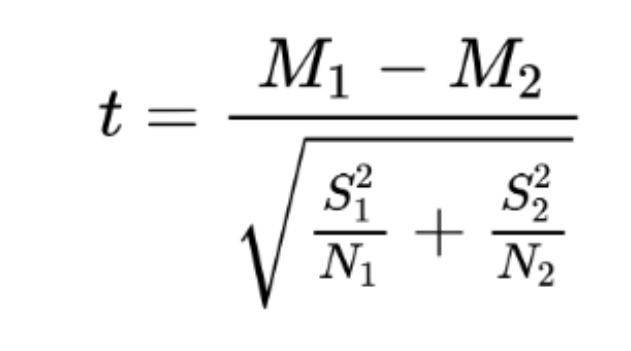
In this equation, M1 and M2 are the averages of group 1 and 2. S1 and S2 are the standard deviations of group 1 and 2, and N1 and N2 are number of samples in group 1 and 2 respectively

Generally speaking, the null hypothesis is that the two groups show no statistically significant difference. On the other hand, the alternate hypothesis states that the two groups show a statistically significant difference. **When the t-value is larger than a threshold and the p-value is smaller than a threshold, we say that we can reject the null hypothesis and that the two groups show a statistically significant difference**. Typically, 0.01 or 0.05 are used as the p-value thresholds for testing statistical significance. If the p-value is less than 0.05, then it suggests that there is less than 5% probability that the difference between the two groups occurs by chance. In other words, the difference is highly unlikely to be by chance


In [96]:
t, p = stats.ttest_ind(
    email.loc[email['test_control'] == 'personalization', 'converted'].values, 
    email.loc[email['test_control'] == 'control', 'converted'].values, 
    equal_var=False
)
# the stats module from the scipy package has a function named ttest_ind. 
# This function computes t-value and p-value, given the data

In [97]:
print(p)

0.015550470284327801
